In [26]:
import pandas as pd  
import numpy as np 
import matplotlib.pylab as plt 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

from sklearn import preprocessing  

%matplotlib inline  

from sklearn.decomposition import PCA  
from sklearn.impute import KNNImputer  
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix  
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error   #RMSE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

from adjustText import adjust_text  

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)  

In [3]:
df=pd.read_csv('C:/Users/mailk/Downloads/df_final.csv')

In [4]:
df.head(10)

,Unnamed: 0,userid,bookid,RATINGS
0,0,1,1,4
1,1,1,3,4
2,2,1,6,4
3,3,1,47,4
4,4,1,50,4
5,5,1,70,4
6,6,2,5,4
7,7,2,45,4
8,8,2,22,4
9,9,2,3,4


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace('[^A-Za-z\s]+','')
df.head()

,unnamed,userid,bookid,ratings
0,0,1,1,4
1,1,1,3,4
2,2,1,6,4
3,3,1,47,4
4,4,1,50,4


In [13]:
df=df.drop(columns='unnamed')


KeyError: "['unnamed'] not found in axis"

In [14]:
df.head()

,userid,bookid,ratings
0,1,1,4
1,1,3,4
2,1,6,4
3,1,47,4
4,1,50,4


In [16]:
booktitles= pd.read_csv('C:/Users/mailk/Downloads/books.csv')
booktitles.head()

,bookId,title,tags,author,publication,category
0,1,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
1,2,database systems,database|systems|sql|dbms,elmasri rame,delhi pearson 2013 1213p,database
2,3,mastering c,mastering|c|advancec|algorithms,venugopal kr,new delhi tata mcgraw-hill 2016 702p,c|programming
3,4,core python programming,core|python|programming|machine|learning,rao r nageswar,new delhi dreamtech press 2017 715p,python|programming
4,5,distributed database systems,distributed|database|systems|sql|dbms,ray chhand,"nodia pearson india education services pvt, lt...",database|distributed computing


In [19]:
booktitles.columns = booktitles.columns.str.strip().str.lower().str.replace('[^A-Za-z\s]+','')

In [21]:
df = pd.merge(df,booktitles,on='bookid')
df.head(100)

,userid,bookid,ratings,title,tags,author,publication,category
0,1,1,4,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
1,5,1,4,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
2,7,1,4,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
3,15,1,4,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
4,17,1,4,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
5,18,1,4,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
6,19,1,2,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
7,21,1,3,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
8,27,1,3,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
9,31,1,3,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming


In [24]:
df=df.drop(columns='tags')
df=df.drop(columns='author')
df=df.drop(columns='publication')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4067 entries, 0 to 4066
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userid    4067 non-null   int64 
 1   bookid    4067 non-null   int64 
 2   ratings   4067 non-null   int64 
 3   title     4067 non-null   object
 4   category  4067 non-null   object
dtypes: int64(3), object(2)
memory usage: 190.6+ KB


In [27]:
df.groupby('title')['ratings'].mean().sort_values(ascending=False).head()

title
embedded/real-time systems          4.0
artificial intelligence :           4.0
core java for the impatient         4.0
java network programming            4.0
discrete-event system simulation    4.0
Name: ratings, dtype: float64

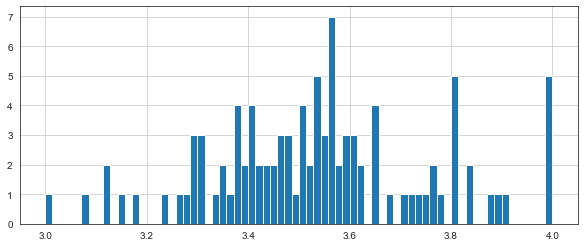

In [43]:
plt.figure(figsize=(10,4))
ratings['ratings'].hist(bins=70)

In [28]:
df.groupby('title')['ratings'].count().sort_values(ascending=False).head()

title
programming in c                               224
drupal 8 development cookbook                  213
computer organization and architecture :       209
c++ coding standards                           190
information technology project management :    137
Name: ratings, dtype: int64

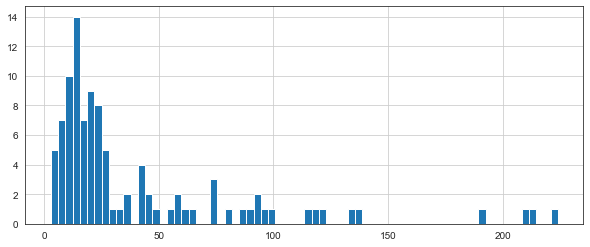

In [36]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

In [30]:
df.head()

,userid,bookid,ratings,title,category
0,1,1,4,programming in c,c|programming
1,5,1,4,programming in c,c|programming
2,7,1,4,programming in c,c|programming
3,15,1,4,programming in c,c|programming
4,17,1,4,programming in c,c|programming


In [33]:
ratings = pd.DataFrame(df.groupby('title')['ratings'].mean())
ratings.head(100)

,ratings
title,
adaptive filtering prediction and control,3.352941
advanced c++,3.382353
advanced database management system,3.461538
advanced internet technology,3.384615
agile web development with rails,3.500000
artificial intelligence :,4.000000
beginning android 4,3.800000
beginning phython,3.583333
business intelligence,3.272727


In [35]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['ratings'].count())
ratings.head(100)

,ratings,num of ratings
title,,
adaptive filtering prediction and control,3.352941,17
advanced c++,3.382353,34
advanced database management system,3.461538,13
advanced internet technology,3.384615,26
agile web development with rails,3.500000,14
artificial intelligence :,4.000000,5
beginning android 4,3.800000,10
beginning phython,3.583333,24
business intelligence,3.272727,11


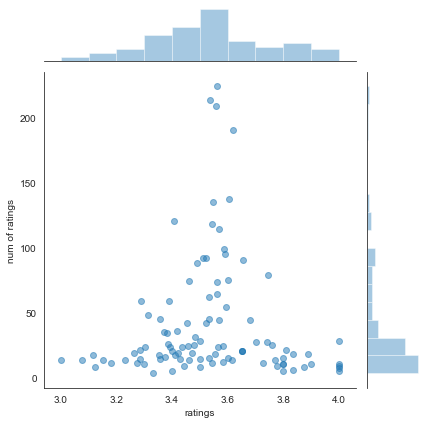

In [45]:
sns.jointplot(x='ratings',y='num of ratings',data=ratings,alpha=0.5)

In [46]:
bookmat = df.pivot_table(index='userid',columns='title',values='ratings')
bookmat.head()

title,adaptive filtering prediction and control,advanced c++,advanced database management system,advanced internet technology,agile web development with rails,artificial intelligence :,beginning android 4,beginning phython,business intelligence,c & data structures,c++,c++ coding standards,c: the complete reference,clean code,cloud computing,code complete,communication networks:,computer graphics,computer networks,computer organization and architecture :,computer science,core java for the impatient,core python programming,cryptography and network security,data communication and networking,data mining,data structure using c,data structures,data warehousing,database management systems,database system concepts,database systems,digital design,discrete-event system simulation,distributed computing,distributed database systems,drupal 8 development cookbook,e-business and e-commerce management:,e-commerce,embedded/real-time systems,fundamentals of computer algorithms,fundamentals of database systems,game architecture and programming,head first java,information storage and management,information technology project management :,information theory coding and cryptography,introduction to algorithms,introduction to artificial neural systems,introduction to computing and problem solving using python,introduction to data compression,introduction to the theory of computation,java 2,java : the complete reference,java network programming,java programming from the group up,learn rails 5.2,learning ruby,let us c,let us java,linux labs and open source technologies,mastering c,microprocessors and interfacing :,microprocessors and interfacing programmng and hardware,"microprocessors architecture,programming, and applications with the 8085",mining of massive datasets,modern operating systems,"neural networks, fuzzy logic, and genetic algorithms :",object oriented programming methodology.,operating system concepts,operating systems,pattern classification,principles of soft computing,professional c++,programming in ansi c,programming in c,programming in java.,programming pearls,programming with c,programming with java,python projects,refactoring,ruby on rails 5.0 for autodidacts: learn ruby 2.3 and rails 5.0,ruby on rails tutorial: learn web development with rails,software engineering,software engineering: a practitioner's approach,systems programming,tactical seo: the theory and practice of search marketing,the 8051 microcontroller,the 8051 microcontroller and embedded systems :,the art of computer programming,the art of seo,the elements of java style,theoretical computer science,web engineering,web technologies,web technology,windows internals : user mode,wireless networks,wordpress seo success
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [47]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,ratings,num of ratings
title,,
programming in c,3.562500,224
drupal 8 development cookbook,3.535211,213
computer organization and architecture :,3.559809,209
c++ coding standards,3.621053,190
information technology project management :,3.605839,137
cloud computing,3.548148,135
data structures,3.408333,120
database systems,3.542373,118
cryptography and network security,3.570175,114


In [63]:
ratings.head(100)

,ratings,num of ratings
title,,
adaptive filtering prediction and control,3.352941,17
advanced c++,3.382353,34
advanced database management system,3.461538,13
advanced internet technology,3.384615,26
agile web development with rails,3.500000,14
artificial intelligence :,4.000000,5
beginning android 4,3.800000,10
beginning phython,3.583333,24
business intelligence,3.272727,11


In [64]:
user_ratings1 = bookmat['wireless networks']
user_ratings2 = bookmat['artificial intelligence :']
user_ratings.head()

userid
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: programming in c, dtype: float64

In [65]:
similar1= bookmat.corrwith(user_ratings1)
similar2 = bookmat.corrwith(user_ratings2)

C:\Users\mailk\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\mailk\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [66]:
corr_1 = pd.DataFrame(similar1,columns=['Correlation'])
corr_1.dropna(inplace=True)
corr_1.head()

,Correlation
title,
advanced internet technology,1.0
modern operating systems,1.0
wireless networks,1.0


In [67]:
corr_1.sort_values('Correlation',ascending=False).head(100)

,Correlation
title,
advanced internet technology,1.0
modern operating systems,1.0
wireless networks,1.0


In [69]:
corr_1 = corr_1.join(ratings['num of ratings'])
corr_1.head()

,Correlation,num of ratings
title,,
advanced internet technology,1.0,26
modern operating systems,1.0,88
wireless networks,1.0,11


In [74]:
corr_2 = pd.DataFrame(similar2,columns=['Correlation'])
corr_2.dropna(inplace=True)
corr_2 = corr_2.join(ratings['num of ratings'])
#corr_2[corr_2['num of ratings']>100].sort_values('Correlation',ascending=False).head(2)
corr_2.sort_values('Correlation',ascending=False).head(100)

,Correlation,num of ratings
title,,
artificial intelligence :,1.0,5
c: the complete reference,1.0,13
operating systems,1.0,15
